# Part 3: Clustering on Datasets following Dimensionality Reduction

In [13]:
# Basic Setup

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA, FastICA, TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from scipy.stats import kurtosis

## Dimensionality Reduction on Car Dataset

In [14]:
# Car Dataset Setup

cars_df = pd.read_csv("data/car_evaluation.csv", names = ["buying","maint", "doors", "persons", "lug_boot","safety","class"])
cars_df.head()
cleanup_nums = {"class":     {"unacc": 4, "acc": 3,'good': 2,'vgood':1}
                }
cars_df.replace(cleanup_nums,inplace = True)
target = cars_df['class']
print(target.value_counts())

cars_df.drop( ['class'],axis = 1,inplace = True)
cars_df_categorical = pd.get_dummies(cars_df)
cars_df_categorical.head()

X_train,X_test,Y_train,Y_test = train_test_split(cars_df_categorical, target, random_state=42)

print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

target.value_counts()

sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

storage = {
    'ica_kurt': [],
    'rp_kurt': [],
}


whole_dataset = np.concatenate((X_train_std,X_test),axis=0)
print(whole_dataset.shape)

6463
1    4091
0    2372
Name: quality, dtype: int64
(6463, 12)


/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standard

ValueError: x and y must have same first dimension, but have shapes (21,) and (12,)

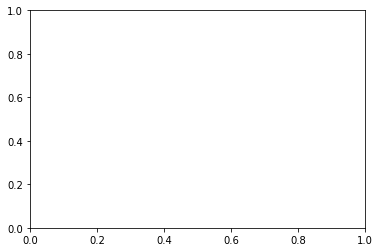

In [15]:
# PCA

car_pca = PCA()
car_reduced_X_train = car_pca.fit_transform(whole_dataset)

plt.figure()
plt.plot(np.arange(1,22), 100*np.cumsum(car_pca.explained_variance_ratio_))
plt.title('PCA Explained Variance for Car Dataset')
plt.ylabel('Explained Variance')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(np.arange(1,22))
plt.show()



# SVD

car_svd = TruncatedSVD(n_components=20)
car_reduced_X_train = car_svd.fit_transform(whole_dataset)

plt.figure()
plt.plot(np.arange(1,21), 100*np.cumsum(car_svd.explained_variance_ratio_))
plt.title('SVD Explained Variance for Car Dataset')
plt.ylabel('Explained Variance')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(np.arange(1,21))
plt.show()


#final datasets for nn 
pca_dataset = PCA(n_components=14).fit_transform(whole_dataset)
print(pca_dataset.shape)
svd_dataset = TruncatedSVD(n_components=15).fit_transform(whole_dataset)


/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:305: UserWarning: n_components is too large: it will be set to 21
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceW

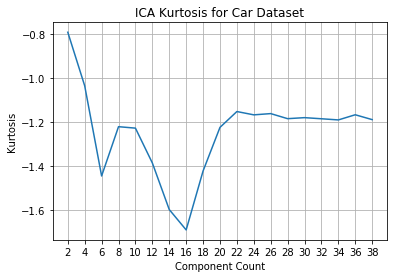

In [4]:
# ICA

component_range = np.arange(2, 40, 2)

for i in component_range:
    car_ica = FastICA(n_components=i)
    car_reduced_X_train  = car_ica.fit_transform(X_train)
    storage['ica_kurt'].append(np.mean(kurtosis(car_reduced_X_train)))

plt.figure()
plt.plot(component_range, storage['ica_kurt'])
plt.title('ICA Kurtosis for Car Dataset')
plt.ylabel('Kurtosis')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(component_range)
plt.show()

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (21 < 22).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (21 < 24).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (21 < 26).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/Users/harshsikka/opt/anaconda3/envs/

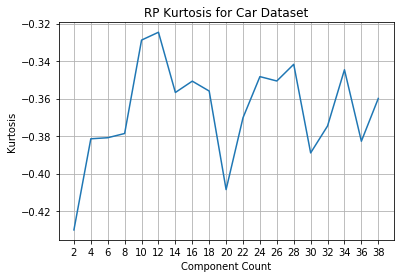

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (21 < 32).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


In [5]:
# RP

component_range = np.arange(2, 40, 2)

for i in component_range:
    car_rp = GaussianRandomProjection(n_components=i)
    car_reduced_X_train  = car_rp.fit_transform(X_train)
    storage['rp_kurt'].append(np.mean(kurtosis(car_reduced_X_train)))

plt.figure()
plt.plot(component_range, storage['rp_kurt'])
plt.title('RP Kurtosis for Car Dataset')
plt.ylabel('Kurtosis')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(component_range)
plt.show()

#final datasets for nn 
rp_dataset = GaussianRandomProjection(n_components=32).fit_transform(whole_dataset)
ica_dataset = FastICA(n_components=16).fit_transform(whole_dataset)

## Clustering on Car Dataset

In [6]:
# Basic Setup

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, silhouette_score, davies_bouldin_score


### Clustering on PCA

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

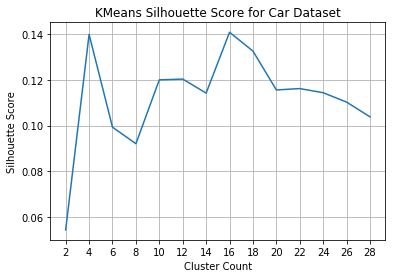

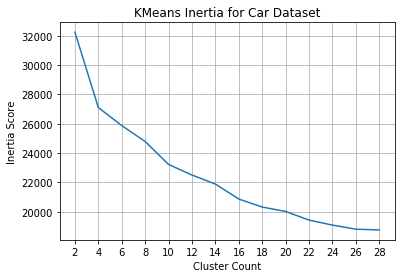

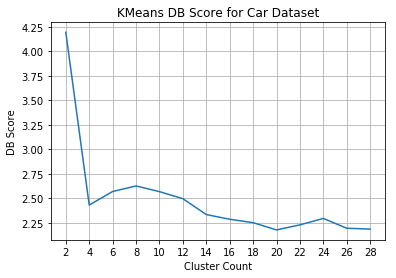

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

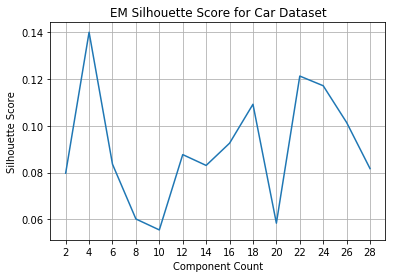

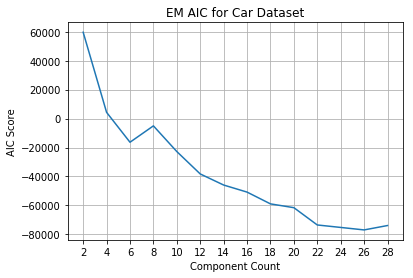

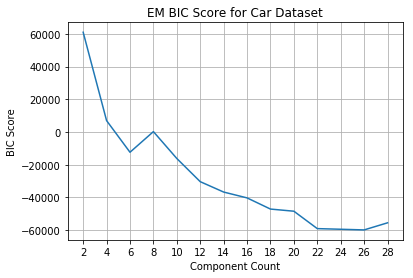

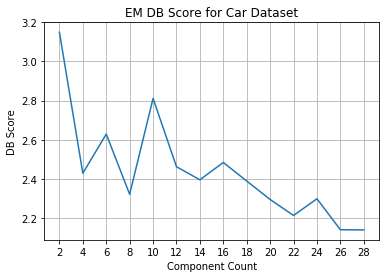

In [8]:
#KMeans

storage = {
    'silhouette_score': [],
    'inertia_score': [],
    'db_score': [],
}

cluster_range = np.arange(2, 30, 2)

for i in cluster_range:
    km_model = KMeans(n_clusters=i, random_state=42)
    storage['silhouette_score'].append(silhouette_score(pca_dataset, km_model.fit_predict(pca_dataset)))
    storage['inertia_score'].append(km_model.inertia_)
    storage['db_score'].append(davies_bouldin_score(pca_dataset, km_model.fit_predict(pca_dataset)))
plt.figure()
plt.plot(cluster_range, storage['silhouette_score'])
plt.title('KMeans Silhouette Score for Car Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['inertia_score'])
plt.title('KMeans Inertia for Car Dataset')
plt.ylabel('Inertia Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('KMeans DB Score for Car Dataset')
plt.ylabel('DB Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

#EM

storage = {
    'silhouette_score': [],
    'aic_score': [],
    'bic_score': [],
    'db_score': [],
}

Component_range = np.arange(2, 30, 2)

for i in Component_range:
    em_model = GaussianMixture(n_components=i, random_state=42)
    em_model.fit(pca_dataset)
    storage['bic_score'].append(em_model.bic(pca_dataset))
    storage['aic_score'].append(em_model.aic(pca_dataset))
    storage['silhouette_score'].append(silhouette_score(pca_dataset, em_model.fit_predict(pca_dataset)))
    storage['db_score'].append(davies_bouldin_score(pca_dataset, em_model.fit_predict(pca_dataset)))
    
plt.figure()
plt.plot(Component_range, storage['silhouette_score'])
plt.title('EM Silhouette Score for Car Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(Component_range, storage['aic_score'])
plt.title('EM AIC for Car Dataset')
plt.ylabel('AIC Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(Component_range, storage['bic_score'])
plt.title('EM BIC Score for Car Dataset')
plt.ylabel('BIC Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()


plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('EM DB Score for Car Dataset')
plt.ylabel('DB Score')
plt.xlabel('Component Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

### Clustering on SVD

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

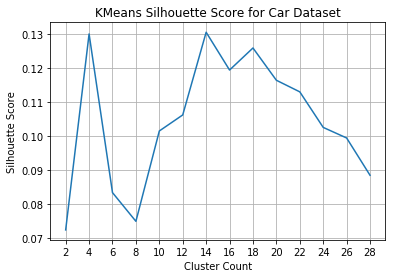

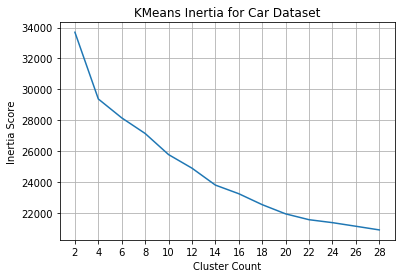

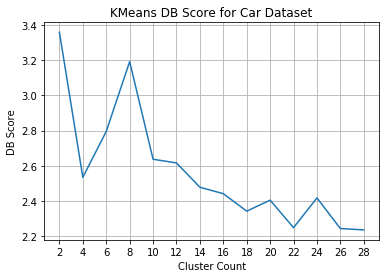

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

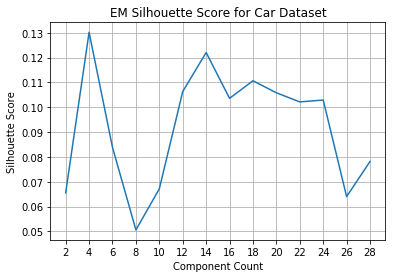

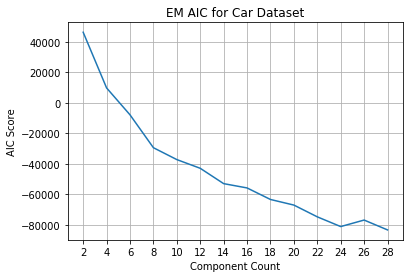

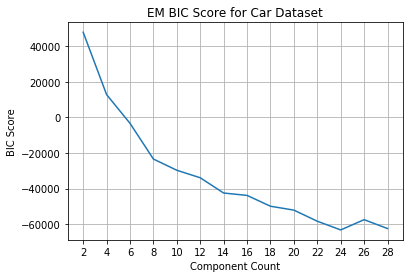

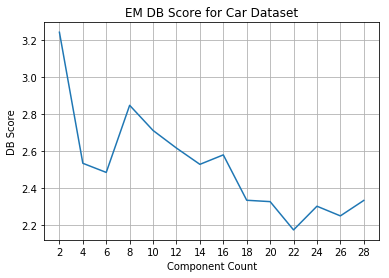

In [10]:
#KMeans

storage = {
    'silhouette_score': [],
    'inertia_score': [],
    'db_score': [],
}

cluster_range = np.arange(2, 30, 2)

for i in cluster_range:
    km_model = KMeans(n_clusters=i, random_state=42)
    storage['silhouette_score'].append(silhouette_score(svd_dataset, km_model.fit_predict(svd_dataset)))
    storage['inertia_score'].append(km_model.inertia_)
    storage['db_score'].append(davies_bouldin_score(svd_dataset, km_model.fit_predict(svd_dataset)))
plt.figure()
plt.plot(cluster_range, storage['silhouette_score'])
plt.title('KMeans Silhouette Score for Car Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['inertia_score'])
plt.title('KMeans Inertia for Car Dataset')
plt.ylabel('Inertia Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('KMeans DB Score for Car Dataset')
plt.ylabel('DB Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

#EM

storage = {
    'silhouette_score': [],
    'aic_score': [],
    'bic_score': [],
    'db_score': [],
}

Component_range = np.arange(2, 30, 2)

for i in Component_range:
    em_model = GaussianMixture(n_components=i, random_state=42)
    em_model.fit(svd_dataset)
    storage['bic_score'].append(em_model.bic(svd_dataset))
    storage['aic_score'].append(em_model.aic(svd_dataset))
    storage['silhouette_score'].append(silhouette_score(svd_dataset, em_model.fit_predict(svd_dataset)))
    storage['db_score'].append(davies_bouldin_score(svd_dataset, em_model.fit_predict(svd_dataset)))
    
plt.figure()
plt.plot(Component_range, storage['silhouette_score'])
plt.title('EM Silhouette Score for Car Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(Component_range, storage['aic_score'])
plt.title('EM AIC for Car Dataset')
plt.ylabel('AIC Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(Component_range, storage['bic_score'])
plt.title('EM BIC Score for Car Dataset')
plt.ylabel('BIC Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()


plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('EM DB Score for Car Dataset')
plt.ylabel('DB Score')
plt.xlabel('Component Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

### Clustering on RP

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

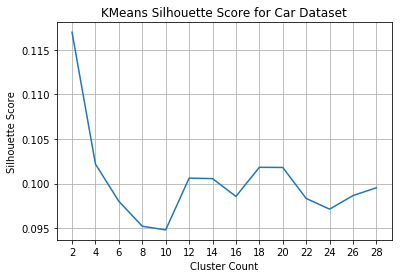

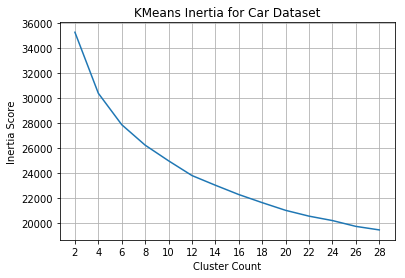

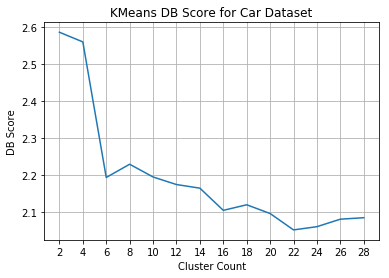

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

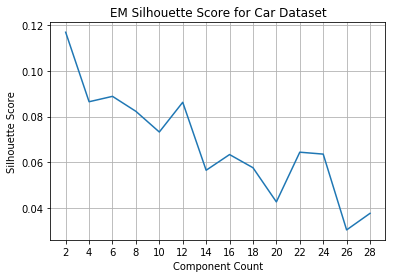

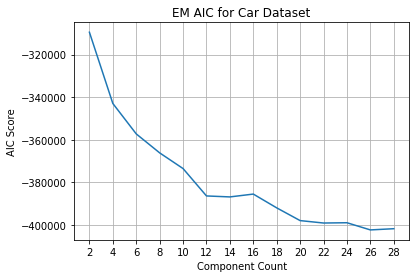

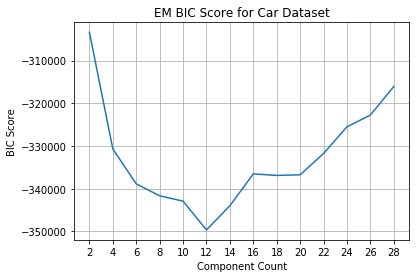

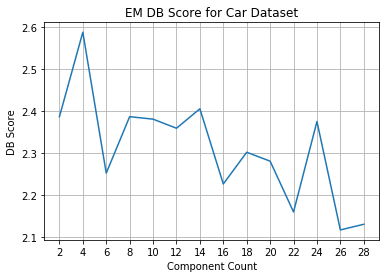

In [11]:
#KMeans

storage = {
    'silhouette_score': [],
    'inertia_score': [],
    'db_score': [],
}

cluster_range = np.arange(2, 30, 2)

for i in cluster_range:
    km_model = KMeans(n_clusters=i, random_state=42)
    storage['silhouette_score'].append(silhouette_score(rp_dataset, km_model.fit_predict(rp_dataset)))
    storage['inertia_score'].append(km_model.inertia_)
    storage['db_score'].append(davies_bouldin_score(rp_dataset, km_model.fit_predict(rp_dataset)))
plt.figure()
plt.plot(cluster_range, storage['silhouette_score'])
plt.title('KMeans Silhouette Score for Car Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['inertia_score'])
plt.title('KMeans Inertia for Car Dataset')
plt.ylabel('Inertia Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('KMeans DB Score for Car Dataset')
plt.ylabel('DB Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

#EM

storage = {
    'silhouette_score': [],
    'aic_score': [],
    'bic_score': [],
    'db_score': [],
}

Component_range = np.arange(2, 30, 2)

for i in Component_range:
    em_model = GaussianMixture(n_components=i, random_state=42)
    em_model.fit(rp_dataset)
    storage['bic_score'].append(em_model.bic(rp_dataset))
    storage['aic_score'].append(em_model.aic(rp_dataset))
    storage['silhouette_score'].append(silhouette_score(rp_dataset, em_model.fit_predict(rp_dataset)))
    storage['db_score'].append(davies_bouldin_score(rp_dataset, em_model.fit_predict(rp_dataset)))
    
plt.figure()
plt.plot(Component_range, storage['silhouette_score'])
plt.title('EM Silhouette Score for Car Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(Component_range, storage['aic_score'])
plt.title('EM AIC for Car Dataset')
plt.ylabel('AIC Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(Component_range, storage['bic_score'])
plt.title('EM BIC Score for Car Dataset')
plt.ylabel('BIC Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()


plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('EM DB Score for Car Dataset')
plt.ylabel('DB Score')
plt.xlabel('Component Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

### Clustering on ICA

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

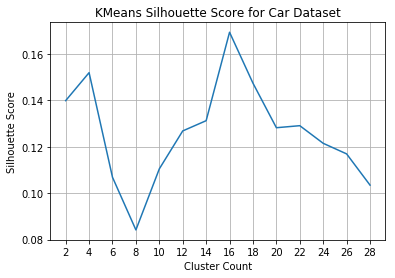

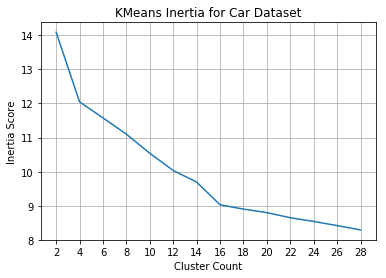

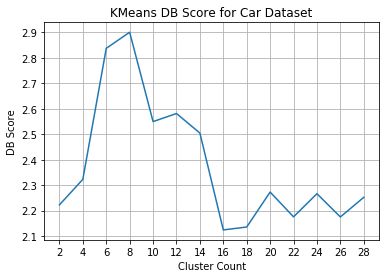

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

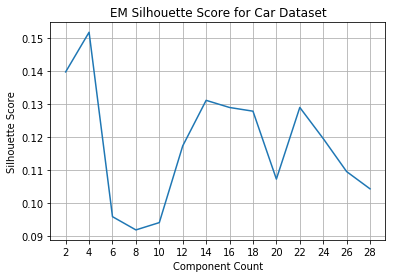

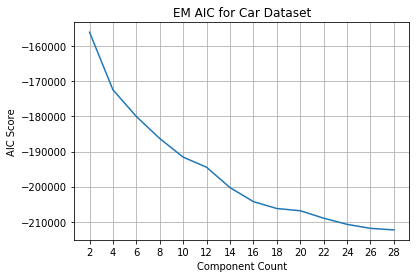

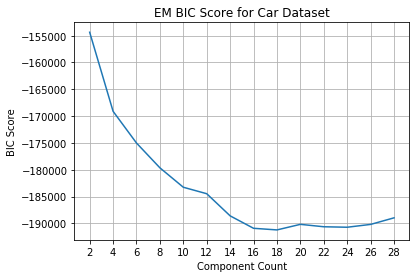

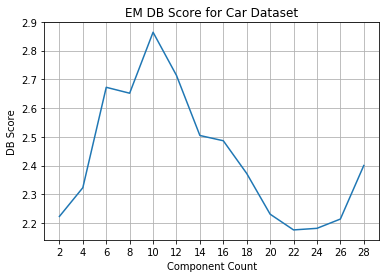

In [12]:
#KMeans

storage = {
    'silhouette_score': [],
    'inertia_score': [],
    'db_score': [],
}

cluster_range = np.arange(2, 30, 2)

for i in cluster_range:
    km_model = KMeans(n_clusters=i, random_state=42)
    storage['silhouette_score'].append(silhouette_score(ica_dataset, km_model.fit_predict(ica_dataset)))
    storage['inertia_score'].append(km_model.inertia_)
    storage['db_score'].append(davies_bouldin_score(ica_dataset, km_model.fit_predict(ica_dataset)))
plt.figure()
plt.plot(cluster_range, storage['silhouette_score'])
plt.title('KMeans Silhouette Score for Car Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['inertia_score'])
plt.title('KMeans Inertia for Car Dataset')
plt.ylabel('Inertia Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('KMeans DB Score for Car Dataset')
plt.ylabel('DB Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

#EM

storage = {
    'silhouette_score': [],
    'aic_score': [],
    'bic_score': [],
    'db_score': [],
}

Component_range = np.arange(2, 30, 2)

for i in Component_range:
    em_model = GaussianMixture(n_components=i, random_state=42)
    em_model.fit(ica_dataset)
    storage['bic_score'].append(em_model.bic(ica_dataset))
    storage['aic_score'].append(em_model.aic(ica_dataset))
    storage['silhouette_score'].append(silhouette_score(ica_dataset, em_model.fit_predict(ica_dataset)))
    storage['db_score'].append(davies_bouldin_score(ica_dataset, em_model.fit_predict(ica_dataset)))
    
plt.figure()
plt.plot(Component_range, storage['silhouette_score'])
plt.title('EM Silhouette Score for Car Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(Component_range, storage['aic_score'])
plt.title('EM AIC for Car Dataset')
plt.ylabel('AIC Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(Component_range, storage['bic_score'])
plt.title('EM BIC Score for Car Dataset')
plt.ylabel('BIC Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()


plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('EM DB Score for Car Dataset')
plt.ylabel('DB Score')
plt.xlabel('Component Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()